In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv'
                )
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15','price']

In [28]:
df = data[features]

In [29]:
df = df[df['bedrooms'] <= 11]

In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chuyển kiểu dữ liệu các cột sang float
cols_to_convert = ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
df[cols_to_convert] = df[cols_to_convert].astype(float)


# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()


df.loc[:, ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']] = scaler.fit_transform(df[['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']])

In [31]:
features1 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
X = df[features1]
y = df['price']

print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00    -0.979841 -0.228326     1.0           0     0   
1             3       2.25     0.533602 -0.189891     2.0           0     0   
2             2       1.00    -1.426252 -0.123306     1.0           0     0   
3             4       3.00    -0.130571 -0.244019     1.0           0     0   
4             3       2.00    -0.435437 -0.169660     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50    -0.598758 -0.337427     3.0           0     0   
21609         4       2.50     0.250512 -0.224391     2.0           0     0   
21610         2       0.75    -1.154050 -0.332140     2.0           0     0   
21611         3       2.50    -0.522542 -0.307080     2.0           0     0   
21612         2       0.75    -1.154050 -0.338755     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [32]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,train_size=0.88, random_state=0)

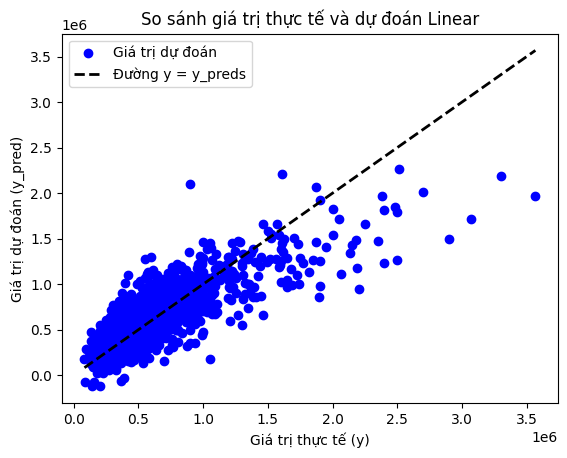

R-square: 0.65072719


In [33]:
from sklearn.linear_model import LinearRegression
base_linear = LinearRegression()
base_linear.fit(X_train, y_train)
base_linear_preds = base_linear.predict(X_valid)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_valid, base_linear_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2, label='Đường y = y_preds')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán Linear")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {base_linear.score(X_train, y_train):.8f}")

In [34]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, 2, 10000)
lasso_cv = LassoCV(alphas = alphas, cv=10, max_iter=5000)
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)


Best alpha: 58.58369737125164


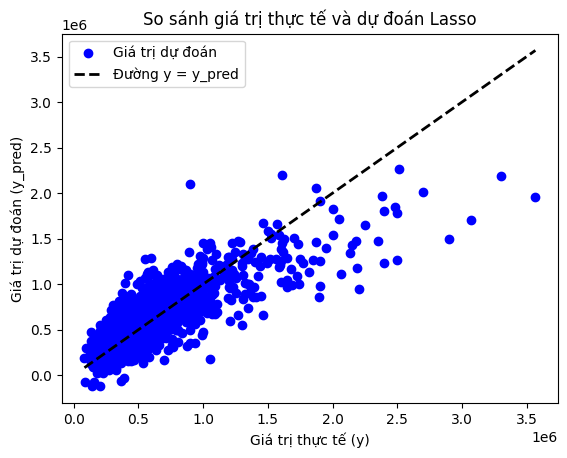

R-square: 0.65068708


In [35]:
from sklearn.linear_model import Lasso

base_lasso = Lasso(alpha = 58.58369737125164, max_iter=10000)
base_lasso.fit(X_train,y_train)
base_lasso_preds = base_lasso.predict(X_valid)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_valid, base_lasso_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2, label='Đường y = y_pred')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán Lasso")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {base_lasso.score(X_train, y_train):.8f}")

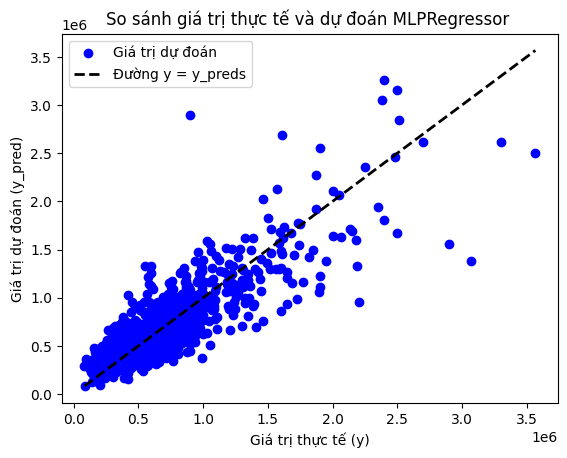

R-square: 0.77949413


In [36]:
from sklearn.neural_network import MLPRegressor
base_MLP = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42, learning_rate_init=0.01)
base_MLP.fit(X_train, y_train)
base_MLP_preds = base_MLP.predict(X_valid)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_valid, base_MLP_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2, label='Đường y = y_preds')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán MLPRegressor ")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {base_MLP.score(X_train, y_train):.8f}")

In [37]:
test_pred_lasso = base_lasso.predict(X_test)
test_pred_linear = base_linear.predict(X_test)
test_pred_MLP = base_MLP.predict(X_test)


# Tao du lieu train cho mo hinh chinh(mo hinh meta)
stacked_predictions = np.column_stack((base_lasso_preds, base_linear_preds, base_MLP_preds)) #Tao ma tran bang ket hop du doan tu 3 mo hinh co so tren tap X_valid -> dung de huan luyen meta
stacked_test_predictions = np.column_stack((test_pred_lasso, test_pred_linear, test_pred_MLP)) #Tao ma tran tu cac du doan cua base tren tap X_meta

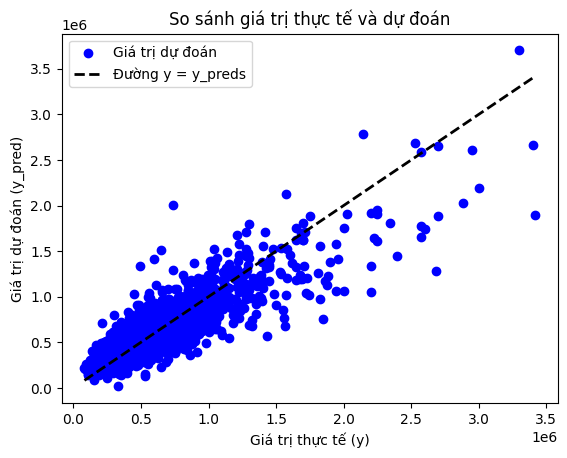

R-square: 0.74911530


In [38]:
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_valid) #Huan luyen mo hinh sao cho y du doan khop vs y thuc te nhat

meta_preds = meta_model.predict(stacked_test_predictions)

# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_test, meta_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường y = y_preds')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {meta_model.score(stacked_predictions, y_valid):.8f}" )

In [39]:
# Dự đoán trên tập huấn luyện (sử dụng X_valid và y_valid cho meta model)
train_stack_preds = meta_model.predict(stacked_predictions)  # Dự đoán trên tập huấn luyện
train_mse = mean_squared_error(y_valid, train_stack_preds)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_valid, train_stack_preds)
train_r2 = r2_score(y_valid, train_stack_preds)

print("Đánh giá trên tập huấn luyện:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R² Score: {train_r2}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}\n")

# Dự đoán trên tập kiểm tra (sử dụng X_test cho meta model)
test_stack_preds = meta_model.predict(stacked_test_predictions)  # Dự đoán trên tập kiểm tra
test_mse = mean_squared_error(y_test, test_stack_preds)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_stack_preds)
test_r2 = r2_score(y_test, test_stack_preds)

print("Đánh giá trên tập kiểm tra:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R² Score: {test_r2}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")


Đánh giá trên tập huấn luyện:
Mean Squared Error: 30384803805.58859
Mean Absolute Error: 116187.0714319219
R² Score: 0.7491153049539215
Root Mean Squared Error (RMSE): 174312.37421820802

Đánh giá trên tập kiểm tra:
Mean Squared Error: 27553753413.86188
Mean Absolute Error: 113797.2293639912
R² Score: 0.7552274398860822
Root Mean Squared Error (RMSE): 165993.23303635567


In [40]:
import time

# Đo thời gian huấn luyện
start_time = time.time()
meta_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.4f} giây")

# Đo thời gian dự đoán trên tập kiểm tra
start_time = time.time()
test_predictions = meta_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Thời gian dự đoán: {prediction_time:.4f} giây")


Thời gian huấn luyện: 0.0522 giây
Thời gian dự đoán: 0.0047 giây


In [45]:
sample_size = [5000, 10000, 15000, 20000]
for size in sample_size:
    # Lấy mẫu dữ liệu
    X_sample = X_train[:size]
    y_sample = y_train[:size]

    # Khởi tạo thời gian huấn luyện
    start_time = time.time()

    # Huấn luyện các mô hình cơ bản
    base_lasso.fit(X_sample, y_sample)
    base_linear.fit(X_sample, y_sample)
    base_MLP.fit(X_sample, y_sample)

    # Dự đoán trên tập xác thực để tạo dữ liệu cho meta-model
    base_lasso_preds = base_lasso.predict(X_valid)
    base_linear_preds = base_linear.predict(X_valid)
    base_MLP_preds = base_MLP.predict(X_valid)

    # Xếp chồng các dự đoán từ các mô hình cơ bản
    stacked_predictions = np.column_stack((base_lasso_preds, base_linear_preds, base_MLP_preds))

    # Huấn luyện mô hình meta
    meta_model.fit(stacked_predictions, y_valid)

    # Thời gian huấn luyện
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện với mẫu {size}: {train_time:.4f} giây")


Thời gian huấn luyện với mẫu 5000: 25.4526 giây
Thời gian huấn luyện với mẫu 10000: 31.2707 giây
Thời gian huấn luyện với mẫu 15000: 53.6404 giây
Thời gian huấn luyện với mẫu 20000: 106.8180 giây


In [42]:
num_params = len(meta_model.coef_) + 1  # +1 cho hệ số chặn (intercept)
print(f"Số lượng tham số trong mô hình: {num_params}")

print("Hệ số hồi quy (Weights):", meta_model.coef_)
print("Hệ số chặn (Intercept):", meta_model.intercept_)

Số lượng tham số trong mô hình: 16
Hệ số hồi quy (Weights): [-4.40822947e+04  5.06037419e+04  1.19780719e+18 -1.24292056e+03
  2.41818577e+04  5.67999844e+05  4.44590648e+04  1.87096691e+04
  1.21033006e+05 -1.07996099e+18 -5.77192756e+17  1.01224163e+04
 -1.53615836e+04 -1.07219980e+05  2.71459695e+03]
Hệ số chặn (Intercept): -458763.3009209529
